# Module 1

We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review however to do so we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.  

## 1. Loading Dataset and Cleaning

First we load required libraries and datasets, merge two datasets, and take a peek at the data.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
transaction = pd.read_excel("QVI_transaction_data.xlsx")
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
purchase = pd.read_csv("QVI_purchase_behaviour.csv")
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [7]:
# merge 2 datasets together
data = pd.merge(transaction, purchase, on='LYLTY_CARD_NBR', how='left')
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


We can see that the date column is in an integer format. We now want to change this to a date format.

In [9]:
from datetime import date, timedelta

start_date = date(1899,12,30)
new_date = []

for date in data['DATE']:
    delta = timedelta(date)
    new_date.append(start_date + delta)

data['DATE'] = pd.to_datetime(pd.Series(new_date))
data['DATE'].head()

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]

 Now check that we are looking at the right products by examining PROD_NAME.

In [10]:
data['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

Looks like we are definitely looking at potato chips. We want to examine the words in PROD_NAME to see if there are any incorrect entries such as products that are not chips. 

In [11]:
from collections import Counter

# remove special characters and numbers in PROD_NAME column
new_name = data['PROD_NAME'].str.replace('&','').str.replace('[0-9]+[gG]','')

# word count and sort
words_list = list(new_name.str.split())
words_list = [word for words in words_list for word in words]
Counter(words_list).most_common()

[('Chips', 49770),
 ('Kettle', 41288),
 ('Smiths', 28860),
 ('Salt', 27976),
 ('Cheese', 27890),
 ('Pringles', 25102),
 ('Doritos', 24962),
 ('Crinkle', 23960),
 ('Corn', 22063),
 ('Original', 21560),
 ('Cut', 20754),
 ('Chip', 18645),
 ('Chicken', 18577),
 ('Salsa', 18094),
 ('Sea', 14145),
 ('Thins', 14075),
 ('Chilli', 13895),
 ('Sour', 13882),
 ('Crisps', 12607),
 ('Vinegar', 12402),
 ('RRD', 11894),
 ('Infuzions', 11057),
 ('Supreme', 10963),
 ('WW', 10320),
 ('Cobs', 9693),
 ('Popd', 9693),
 ('Tortilla', 9580),
 ('Tostitos', 9471),
 ('Twisties', 9454),
 ('Sensations', 9429),
 ('Old', 9324),
 ('El', 9324),
 ('Paso', 9324),
 ('Dip', 9324),
 ('Sweet', 7883),
 ('Lime', 7852),
 ('Chives', 7846),
 ('Tomato', 7669),
 ('Cream', 7618),
 ('Thinly', 7507),
 ('Tyrrells', 6442),
 ('And', 6373),
 ('BBQ', 6351),
 ('Tangy', 6332),
 ('Grain', 6272),
 ('Waves', 6272),
 ('Lightly', 6248),
 ('Salted', 6248),
 ('Soy', 6121),
 ('Natural', 6050),
 ('Mild', 6048),
 ('Red', 5885),
 ('Rock', 5885),
 ('Del

There are salsa products in the dataset but we are only interested in the chips category, so we will remove these.

In [12]:
data = data[~data['PROD_NAME'].str.contains('Salsa')]

Summarize the data to check for possible outliers.

In [13]:
data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [14]:
data.sort_values(by='PROD_QTY', ascending=False).head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
135225,2019-05-15,46,46296,42138,81,Pringles Original Crisps 134g,5,18.5,RETIREES,Budget
69523,2019-05-15,71,71142,69852,96,WW Original Stacked Chips 160g,5,9.5,OLDER FAMILIES,Premium
69502,2018-08-18,55,55144,49328,44,Thins Chips Light& Tangy 175g,5,16.5,OLDER FAMILIES,Premium


In [15]:
data[data['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium


There are two transactions where 200 packets of chips are bought in one transaction, and both of the transactions were made by the same customer. We also notice that this customer only had 2 transactions over a year and this is not an ordinary retail customer. We will remove these 2 transactions out of our data.

In [16]:
data = data[data['LYLTY_CARD_NBR'] != 226000]

We now want to check the data by date.

In [17]:
data['DATE'].nunique()

364

In [18]:
data['DATE'].min()

Timestamp('2018-07-01 00:00:00')

In [19]:
data['DATE'].max()

Timestamp('2019-06-30 00:00:00')

There are only 364 unique dates out of our one year data, which means that there is one missing date. We now want to find the missing date by creating a line chart of number of transactions over time.

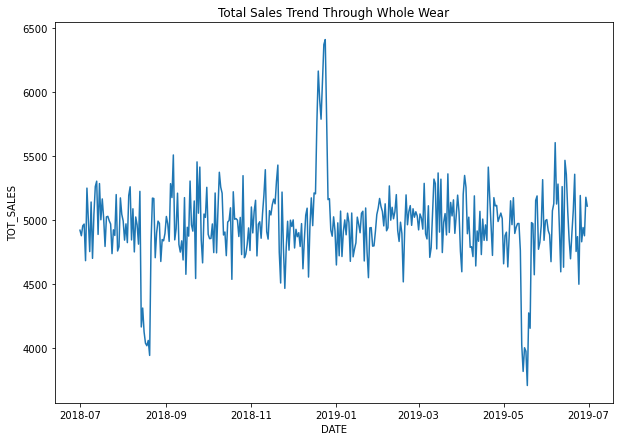

In [20]:
sub_data = data.groupby('DATE').agg({'TOT_SALES':'sum'}).reset_index()

plt.figure(figsize=(10,7))
sns.lineplot(x='DATE', y='TOT_SALES', data=sub_data)
plt.title('Total Sales Trend Through Whole Wear')
plt.show()

In [21]:
# zoom in total sales in December
december = data[data['DATE'].dt.month == 12]
sorted(december['DATE'].unique())

[numpy.datetime64('2018-12-01T00:00:00.000000000'),
 numpy.datetime64('2018-12-02T00:00:00.000000000'),
 numpy.datetime64('2018-12-03T00:00:00.000000000'),
 numpy.datetime64('2018-12-04T00:00:00.000000000'),
 numpy.datetime64('2018-12-05T00:00:00.000000000'),
 numpy.datetime64('2018-12-06T00:00:00.000000000'),
 numpy.datetime64('2018-12-07T00:00:00.000000000'),
 numpy.datetime64('2018-12-08T00:00:00.000000000'),
 numpy.datetime64('2018-12-09T00:00:00.000000000'),
 numpy.datetime64('2018-12-10T00:00:00.000000000'),
 numpy.datetime64('2018-12-11T00:00:00.000000000'),
 numpy.datetime64('2018-12-12T00:00:00.000000000'),
 numpy.datetime64('2018-12-13T00:00:00.000000000'),
 numpy.datetime64('2018-12-14T00:00:00.000000000'),
 numpy.datetime64('2018-12-15T00:00:00.000000000'),
 numpy.datetime64('2018-12-16T00:00:00.000000000'),
 numpy.datetime64('2018-12-17T00:00:00.000000000'),
 numpy.datetime64('2018-12-18T00:00:00.000000000'),
 numpy.datetime64('2018-12-19T00:00:00.000000000'),
 numpy.datet

Data from 2018-12-25 is missing, and this is due to the Christmas holiday. 

We now look at LIFESTAGE and PREMIUM_CUSTOMER columns to check if there are any outliers.

In [111]:
data.groupby('LIFESTAGE')['LIFESTAGE'].count().sort_values(ascending=False)

LIFESTAGE
OLDER SINGLES/COUPLES     50793
RETIREES                  46431
OLDER FAMILIES            45158
YOUNG FAMILIES            40494
YOUNG SINGLES/COUPLES     33969
MIDAGE SINGLES/COUPLES    23398
NEW FAMILIES               6497
Name: LIFESTAGE, dtype: int64

In [112]:
data.groupby('PREMIUM_CUSTOMER')['PREMIUM_CUSTOMER'].count().sort_values(ascending=False)

PREMIUM_CUSTOMER
Mainstream    95043
Budget        86762
Premium       64935
Name: PREMIUM_CUSTOMER, dtype: int64

There do not seem to be any issues with LIFESTAGE and PREMIUM_CUSTOMER columns.

## 2. Creating other features 

### pack size

In [22]:
data['PACKET_SIZE'] = data['PROD_NAME'].str.extract('(\d+)').astype(int)
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACKET_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,150


In [23]:
max(data['PACKET_SIZE'])

380

In [24]:
min(data['PACKET_SIZE'])

70

In [107]:
data.groupby('PACKET_SIZE').count()['TOT_SALES'].sort_values(ascending=False)

PACKET_SIZE
175    66390
150    40203
134    25102
110    22387
170    19983
165    15297
330    12540
380     6416
270     6285
210     6272
200     4473
135     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: TOT_SALES, dtype: int64

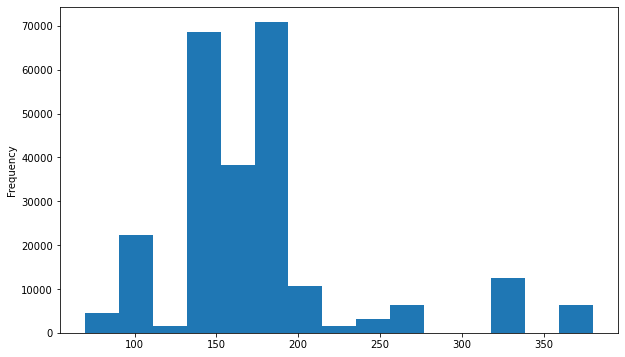

In [100]:
data['PACKET_SIZE'].plot.hist(figsize=(10,6), bins=15)

The largest size is 380g and the smallest size is 70g. Mid-size (175g, 150g) chips are best selling.

### Brand

In [26]:
def brand(df):
    return df['PROD_NAME'].split()[0]

data['BRAND'] = data.apply(brand, axis=1)
data['BRAND'].value_counts().sort_values(ascending=False)

Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND, dtype: int64

Some of the brand names do not only have one word. By closely examine the brand names, it looks like some of the brands have different names. We will combine them together.

In [27]:
dic = {'Dorito':'Doritos', 'WW':'Woolworths', 'Red':'RRD', 'Natural':'Natural Chip Compny', 'NCC':'Natural Chip Compny',
       'Snbts':'Sunbites', 'Grains':'Grain Waves','GrnWves':'Grain Waves','Infzns':'Infuzions', 'Smith':'Smiths'}
data['BRAND'] = data['BRAND'].replace(dic)
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACKET_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175,Natural Chip Compny
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,150,Kettle


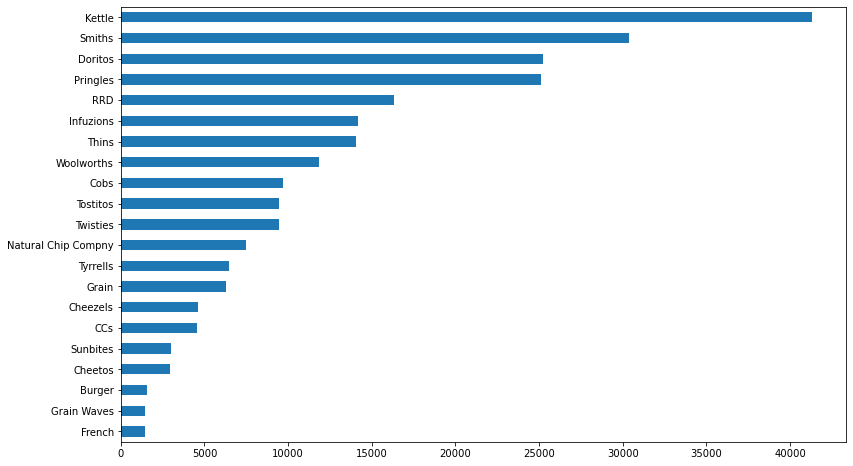

In [28]:
data['BRAND'].value_counts().sort_values().plot(kind='barh', figsize=(13,8))

Kettle, Smiths, and Doritos are top 3 best-selling chips brands.

## 3. Data Analysis

we can define some metrics of interest to the client:
- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment

### 1. Who spends the most on chips, grouping customers by LIFESTAGE and PREMIUM_CUSTOMER ?

In [29]:
customer = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'TOT_SALES':'sum'})
customer = customer.reset_index().sort_values('TOT_SALES')
customer['GROUP'] = customer['LIFESTAGE'] + ' ' + customer['PREMIUM_CUSTOMER']
customer

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,GROUP
5,NEW FAMILIES,Premium,10760.80,NEW FAMILIES Premium
4,NEW FAMILIES,Mainstream,15979.70,NEW FAMILIES Mainstream
3,NEW FAMILIES,Budget,20607.45,NEW FAMILIES Budget
0,MIDAGE SINGLES/COUPLES,Budget,33345.70,MIDAGE SINGLES/COUPLES Budget
20,YOUNG SINGLES/COUPLES,Premium,39052.30,YOUNG SINGLES/COUPLES Premium
2,MIDAGE SINGLES/COUPLES,Premium,54443.85,MIDAGE SINGLES/COUPLES Premium
18,YOUNG SINGLES/COUPLES,Budget,57122.10,YOUNG SINGLES/COUPLES Budget
8,OLDER FAMILIES,Premium,75242.60,OLDER FAMILIES Premium
17,YOUNG FAMILIES,Premium,78571.70,YOUNG FAMILIES Premium
1,MIDAGE SINGLES/COUPLES,Mainstream,84734.25,MIDAGE SINGLES/COUPLES Mainstream


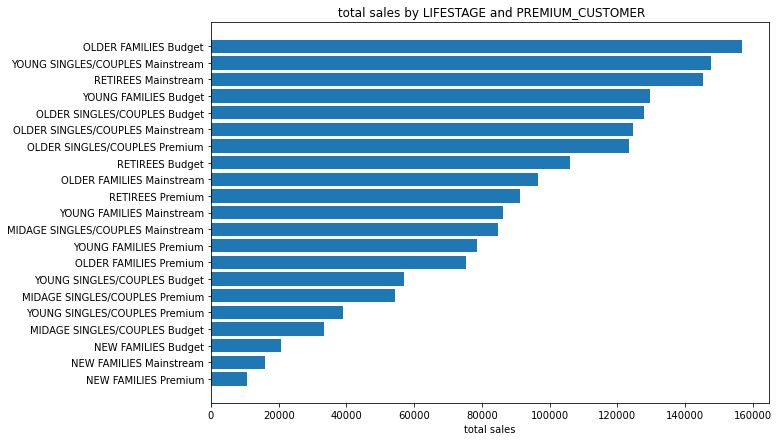

In [30]:
plt.figure(figsize=(10,7))
plt.barh(customer['GROUP'], customer['TOT_SALES'])
plt.title(' total sales by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('total sales')
plt.show()

Sales are coming mainly from older families - Budget, young sigles/couples - mainstream, and Retirees - Mainstream.

### 2. How many customers are in each segment?

Let's see if the higher sales are due to there being more customers who buy chips.

In [31]:
customer_num = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'LYLTY_CARD_NBR':'nunique'})
customer_num = customer_num.reset_index().sort_values('LYLTY_CARD_NBR')
customer_num['GROUP'] = customer_num['LIFESTAGE'] + ' ' + customer_num['PREMIUM_CUSTOMER']
customer_num.rename(columns={'LYLTY_CARD_NBR':'TOT_NUM_CUSTOMERS'}, inplace=True)
customer_num

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_NUM_CUSTOMERS,GROUP
5,NEW FAMILIES,Premium,575,NEW FAMILIES Premium
4,NEW FAMILIES,Mainstream,830,NEW FAMILIES Mainstream
3,NEW FAMILIES,Budget,1087,NEW FAMILIES Budget
0,MIDAGE SINGLES/COUPLES,Budget,1474,MIDAGE SINGLES/COUPLES Budget
8,OLDER FAMILIES,Premium,2231,OLDER FAMILIES Premium
2,MIDAGE SINGLES/COUPLES,Premium,2369,MIDAGE SINGLES/COUPLES Premium
17,YOUNG FAMILIES,Premium,2398,YOUNG FAMILIES Premium
20,YOUNG SINGLES/COUPLES,Premium,2480,YOUNG SINGLES/COUPLES Premium
16,YOUNG FAMILIES,Mainstream,2685,YOUNG FAMILIES Mainstream
7,OLDER FAMILIES,Mainstream,2788,OLDER FAMILIES Mainstream


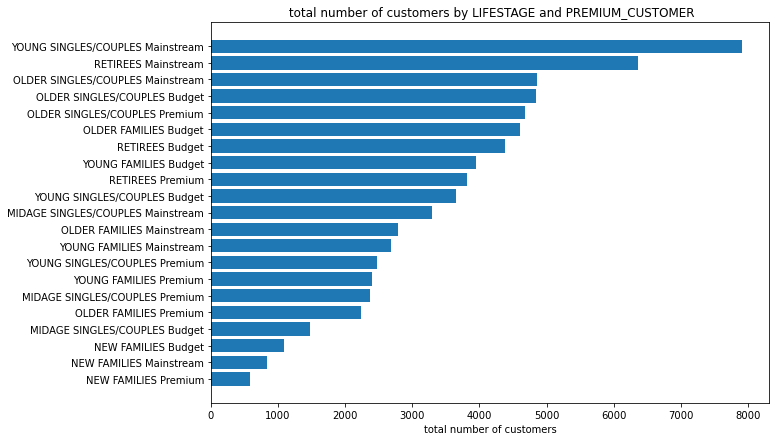

In [32]:
plt.figure(figsize=(10,7))
plt.barh(customer_num['GROUP'], customer_num['TOT_NUM_CUSTOMERS'])
plt.title(' total number of customers by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('total number of customers')
plt.show()

Combine these two plots, we can see that there are more customers from segments of young singles/couples - mainstreamand and retirees - mainstream. This contributes to there being more sales to these customer segments but
this is not a major driver for the Older families - budget customer segment.

### 3.How many chips are bought per customer by segment?

Higher sales may also be driven by more units of chips being bought per customer. Let's have a look at this now. We will calculate and plot the average number of units per customer by  LIFESTAGE and PREMIUM_CUSTOMER.

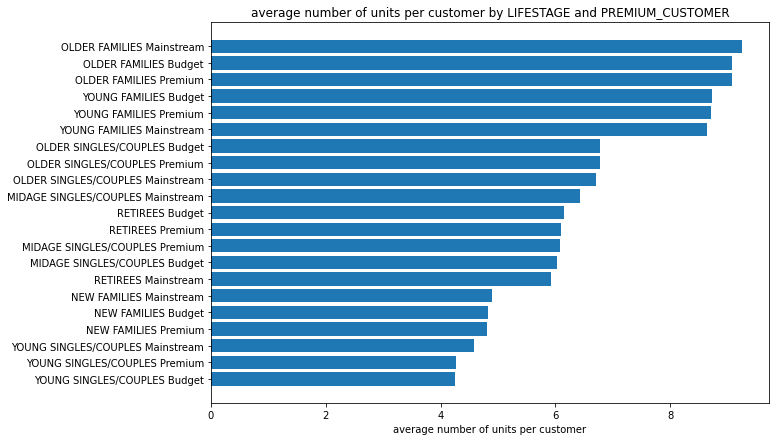

In [33]:
avg_sales = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'LYLTY_CARD_NBR':'nunique', 'PROD_QTY':'sum'})
avg_sales['AVGNUM_PER_CUSTOMER'] = avg_sales['PROD_QTY'] / avg_sales['LYLTY_CARD_NBR']
avg_sales = avg_sales.reset_index().sort_values('AVGNUM_PER_CUSTOMER')
avg_sales['GROUP'] = avg_sales['LIFESTAGE'] + ' ' + avg_sales['PREMIUM_CUSTOMER']

plt.figure(figsize=(10,7))
plt.barh(avg_sales['GROUP'], avg_sales['AVGNUM_PER_CUSTOMER'])
plt.title('average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('average number of units per customer')
plt.show()

In general, older families tend to buy more chips per customer, followed by young families.

### 4. What's the average chip price by customer segment?

We will also investigate the average price per unit chips bought for each customer
segment as this is also a driver of total sales.

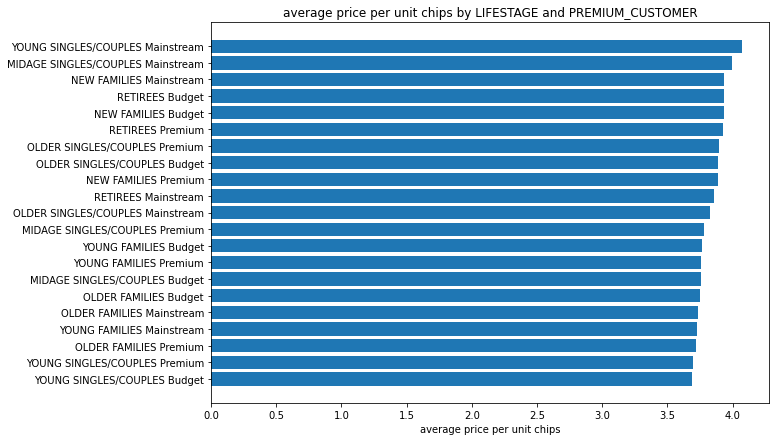

In [34]:
avg_price = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'TOT_SALES':'sum', 'PROD_QTY':'sum'})
avg_price['AVG_PRICE'] = avg_price['TOT_SALES'] / avg_price['PROD_QTY']
avg_price = avg_price.reset_index().sort_values('AVG_PRICE')
avg_price['GROUP'] = avg_price['LIFESTAGE'] + ' ' + avg_price['PREMIUM_CUSTOMER']

plt.figure(figsize=(10,7))
plt.barh(avg_price['GROUP'], avg_price['AVG_PRICE'])
plt.title('average price per unit chips by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('average price per unit chips')
plt.show()

The average price per unit chips by customer segments don't have too much differences, and the average prices are all between \\$3-\\$4. Mainstream customers from young singles/coulples, mindage singles/coules, and new families are more willing to buy more expensive chips compared to the other segments. 

As the difference in average price per unit chips isn't large, we will then check if this difference is statistically significant by performing an indenpendent t-test between mainstream vs. premium and budget midage and young singles and couples.

In [35]:
from scipy.stats import ttest_ind

In [36]:
mainstream = data['PREMIUM_CUSTOMER'] == 'Mainstream'
premium_budget = (data['PREMIUM_CUSTOMER'] == 'Premium') | (data['PREMIUM_CUSTOMER'] == 'Budget')
midage_young = (data['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') | (data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')

data['AVG_PRICE'] = data['TOT_SALES'] / data['PROD_QTY']

a = data[mainstream & midage_young]['AVG_PRICE']
b = data[premium_budget & midage_young]['AVG_PRICE']

stat, p = ttest_ind(a.values, b.values, equal_var=True)
print(stat, p)

37.83196107667815 2.235645611549355e-309


Since the p value < 0.05, we reject null hypothesis and conclude that the unit price for mainstream, young and mid-age singles and couples are significantly higher than that of budget or premium, young and midage singles and couples.

## 4. Deep Dive into Specific Customer Segments for Insights

We want to target customer segments that contribute the most to sales to retain them or further increase sales. We will particularily look at mainstream young single/couples because customers in this segments contribute the most total sales. 

We will find out if there are any brands that these two customer segments prefer more than others. We will use affinity sample analysis using apriori algorithms.

### Apriori Algorithm in Market Basket Analysis

The association rule learning is a rule-based machine learning approach that generates the relationship between variables in a dataset. Using this strategy, the products sold in an association can be explored and can be offered to customers to buy together. For example, it may be discovered that if the customers have bought chips, them most likely have bought soda as well. 

The association rule learning has three popular algorithms. In this project, we will use the Apriori method of association learning.

There are three major components of Apriori algorithm:

- <b>Support</b>: the percentage of time that an itemset appears in the dataset. 
- <b>Confidence</b>: Confidence (x => y) signifies the likelihood of the item y being purchased when the item x is purchased. 
- <b>Lift</b>: Lift (x => y) is the likelihood of the item y being purchased when the item x is sold. 



In [42]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [50]:
# group our data by LYLTY_CARD_NBR and BRAND
segment = data[(data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Mainstream')]
basket = segment.groupby(['LYLTY_CARD_NBR','BRAND'])['PROD_QTY']

# hot encode the data and get 1 transaction per row to prepare to run our mlxtend analysis.
basket = basket.sum().unstack().reset_index().fillna(0).set_index('LYLTY_CARD_NBR')

# convert all of our numbers to either a 1 or a 0
def encode_data(datapoint):
    if datapoint <= 0:
        return 0
    if datapoint >= 1:
        return 1
    
basket = basket.applymap(encode_data)
basket.head()

BRAND,Burger,CCs,Cheetos,Cheezels,Cobs,Doritos,French,Grain,Grain Waves,Infuzions,...,Natural Chip Compny,Pringles,RRD,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,Woolworths
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,,
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1010,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1018,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1020,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1060,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


We have encoded our data to show when a chip brand is sold with another brand. If there is a zero, that means those products haven’t sold together. In other words, if there is a one, that means those two brand are sold together.

Now, we will find out which brands are frequently purchased together. We do this by applying the mlxtend `apriori` fuuinction to our dataset. We will set the minimal level of support to be 0.05.

In [54]:
itemsets = apriori(basket, min_support=0.05, use_colnames=True)
itemsets

,support,itemsets
0,0.103827,(Cobs)
1,0.260326,(Doritos)
2,0.070102,(Grain)
3,0.143110,(Infuzions)
4,0.387142,(Kettle)
5,0.256158,(Pringles)
6,0.093975,(RRD)
7,0.202476,(Smiths)
8,0.136036,(Thins)
9,0.105848,(Tostitos)


Then we will build our association rules using the mxltend `association_rules` function. We set our minimum threshold for the condfidence level to be 0.7.

In [55]:
rules = association_rules(itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Doritos),(Kettle),0.260326,0.387142,0.089933,0.345463,0.892344,-0.010850,0.936324
1,(Kettle),(Doritos),0.387142,0.260326,0.089933,0.232300,0.892344,-0.010850,0.963494
2,(Pringles),(Doritos),0.256158,0.260326,0.062650,0.244576,0.939499,-0.004034,0.979151
3,(Doritos),(Pringles),0.260326,0.256158,0.062650,0.240660,0.939499,-0.004034,0.979590
4,(Smiths),(Doritos),0.202476,0.260326,0.051156,0.252651,0.970519,-0.001554,0.989731
5,(Doritos),(Smiths),0.260326,0.202476,0.051156,0.196507,0.970519,-0.001554,0.992571
6,(Pringles),(Kettle),0.256158,0.387142,0.091449,0.357002,0.922148,-0.007720,0.953126
7,(Kettle),(Pringles),0.387142,0.256158,0.091449,0.236215,0.922148,-0.007720,0.973890
8,(Smiths),(Kettle),0.202476,0.387142,0.075660,0.373674,0.965214,-0.002727,0.978498
9,(Kettle),(Smiths),0.387142,0.202476,0.075660,0.195432,0.965214,-0.002727,0.991246


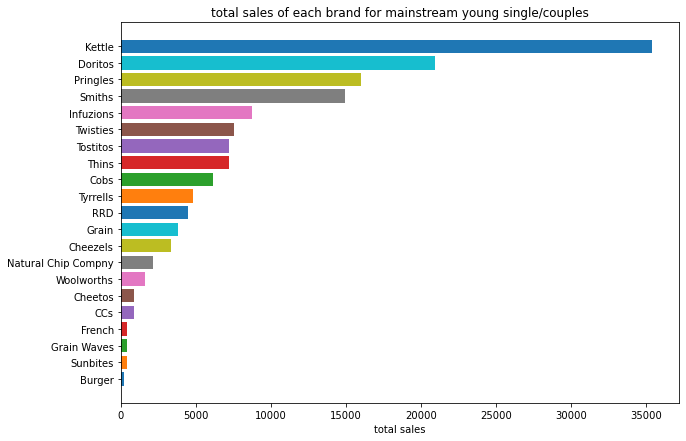

In [73]:
result = segment.groupby('BRAND').sum()['TOT_SALES'].sort_values().reset_index()

plt.figure(figsize=(10,7))
plt.barh(result['BRAND'], result['TOT_SALES'], color=sns.color_palette('tab10'))
plt.title('total sales of each brand for mainstream young single/couples')
plt.xlabel('total sales')
plt.show()

By looking at both results, we can see that Kettle, Doritos, Pringles, and Simiths are the brands that are most chosen by mainstream young single/couples.

### Apriori Algorithms for Packet Sizes

In [58]:
basket_packet_size = segment.groupby(['LYLTY_CARD_NBR','PACKET_SIZE'])['PROD_QTY']
basket_packet_size = basket_packet_size.sum().unstack().reset_index().fillna(0).set_index('LYLTY_CARD_NBR')

basket_packet_size = basket_packet_size.applymap(encode_data)
basket_packet_size.head()

PACKET_SIZE,70,90,110,125,134,135,150,160,165,170,175,180,190,200,210,220,250,270,330,380
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,
1002,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1010,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1018,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1020,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1060,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0


In [94]:
itemsets_packet_size = apriori(basket_packet_size, min_support=0.05, use_colnames=True)
itemsets_packet_size

,support,itemsets
0,0.224454,(110)
1,0.256158,(134)
2,0.313755,(150)
3,0.127700,(165)
4,0.176835,(170)
5,0.458254,(175)
6,0.070102,(210)
7,0.074902,(270)
8,0.139320,(330)
9,0.076418,(380)


In [60]:
rules_packet_size = association_rules(itemsets_packet_size, metric="lift", min_threshold=0.7)
rules_packet_size

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(134),(110),0.256158,0.224454,0.057724,0.225345,1.003972,0.000228,1.001151
1,(110),(134),0.224454,0.256158,0.057724,0.257175,1.003972,0.000228,1.001370
2,(150),(110),0.313755,0.224454,0.065303,0.208132,0.927283,-0.005121,0.979388
3,(110),(150),0.224454,0.313755,0.065303,0.290940,0.927283,-0.005121,0.967823
4,(110),(175),0.224454,0.458254,0.094480,0.420934,0.918560,-0.008377,0.935551
5,(175),(110),0.458254,0.224454,0.094480,0.206174,0.918560,-0.008377,0.976973
6,(150),(134),0.313755,0.256158,0.075028,0.239130,0.933528,-0.005342,0.977621
7,(134),(150),0.256158,0.313755,0.075028,0.292899,0.933528,-0.005342,0.970505
8,(134),(175),0.256158,0.458254,0.111153,0.433925,0.946909,-0.006232,0.957021
9,(175),(134),0.458254,0.256158,0.111153,0.242558,0.946909,-0.006232,0.982045


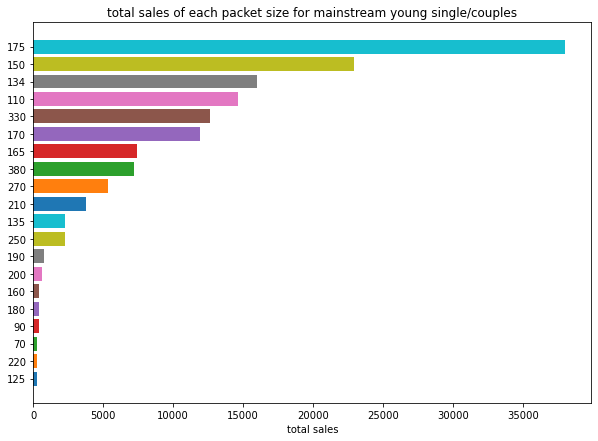

In [92]:
result2 = segment.groupby('PACKET_SIZE').sum()['TOT_SALES'].sort_values().reset_index()

result2['PACKET_SIZE'] = result2['PACKET_SIZE'].astype(str)

plt.figure(figsize=(10,7))
plt.barh(result2['PACKET_SIZE'], result2['TOT_SALES'], color=sns.color_palette('tab10'))
plt.title('total sales of each packet size for mainstream young single/couples')
plt.xlabel('total sales')
plt.show()

By looking at both results, we can see that 175g, 150g, 134g, 110g are the packet sizes that are most popular among mainstream young single/couples customers.

## 5. Insights

- <b>Kettle</b>, <b>Smiths</b>, and <b>Doritos</b> are the top three best-selling chips brands. 
- <b>170g</b> and <b>150g</b> are the two most popular pocket sizes of chips and brought in the largest total sales.
- Top 3 total sales customer segments are:
  - Budget Older Families
  - Mainstream Young Singles/Couples
  - Mainstream Retirees
- <b>Mainstream Young Singles/Couples</b> has the largest customer pool, followed by <b>Mainstream Retirees</b>, which leads them to be the top 3 segments that have high total sales. 
- <b>Budget Older Families,</b> also have very high total sales, and that's because of their high quantity of buying chips per customer. 
- <b>Mainstream Young Singles/Couples</b> tend to buy expensive chips, and the difference between the Mainstream and the non-Mainstream "Young and Midage Singles/Couples" are statistically significant. On the other hand, <b>Budget Older Families,</b> like buying chips that are not expensive.
- By using affinity sample analysis, for <b>Mainstream Young Singles/Couples</b> customer segment, they prefer brand <b>Kettle</b> and pocket size of <b>175g</b>.

## 6. Recommendations

- Older Families:
  - Focus on Budget segment
  - Attract more people to increase the pool size
  - Promotions: buy 3 get 1, etc. (bundle sales), cheaper chips
- Young Singles/Couples:
  - Focus on Mainstream
  - Advertisement should target this group to encourage more purchase
  - Advertise them with Kettle, medium size, expensive chips
- Retirees:
  - Focus on Mainstream
  - Promote cheaper brands
- General:
  - collaborate with merchants Kettle, Smiths, and Doritos more often and promote chips with pocket sizes of 170g and 150g